In [1]:
#stock price prediction
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
!pip install yfinance


quandl is a website used to find the historical data of stocks mainly the TATAGLOBAL stock

In [3]:
import yfinance as yf

# Fetching Tata Consumer Products (formerly Tata Global Beverages)
data = yf.download('TATACONSUM.NS', start='2015-01-01', end='2025-01-01')
print(data.head())

C:\Users\Nidhi Sharma\AppData\Local\Temp\ipykernel_20104\732969479.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download('TATACONSUM.NS', start='2015-01-01', end='2025-01-01')
[*********************100%***********************]  1 of 1 completed

Price              Close          High           Low          Open  \
Ticker     TATACONSUM.NS TATACONSUM.NS TATACONSUM.NS TATACONSUM.NS   
Date                                                                 
2015-01-01    132.653625    133.577890    132.345546    132.873688   
2015-01-02    134.238083    134.854255    132.521599    132.829678   
2015-01-05    134.634186    135.998575    133.489859    133.489859   
2015-01-06    130.408997    133.753948    129.396715    133.753948   
2015-01-07    130.673019    131.333206    128.516411    129.572708   

Price             Volume  
Ticker     TATACONSUM.NS  
Date                      
2015-01-01        535692  
2015-01-02       2043127  
2015-01-05       1873161  
2015-01-06       2390258  
2015-01-07       2770541  


In [4]:
data.shape

(2467, 5)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2467 entries, 2015-01-01 to 2024-12-31
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   (Close, TATACONSUM.NS)   2467 non-null   float64
 1   (High, TATACONSUM.NS)    2467 non-null   float64
 2   (Low, TATACONSUM.NS)     2467 non-null   float64
 3   (Open, TATACONSUM.NS)    2467 non-null   float64
 4   (Volume, TATACONSUM.NS)  2467 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 115.6 KB


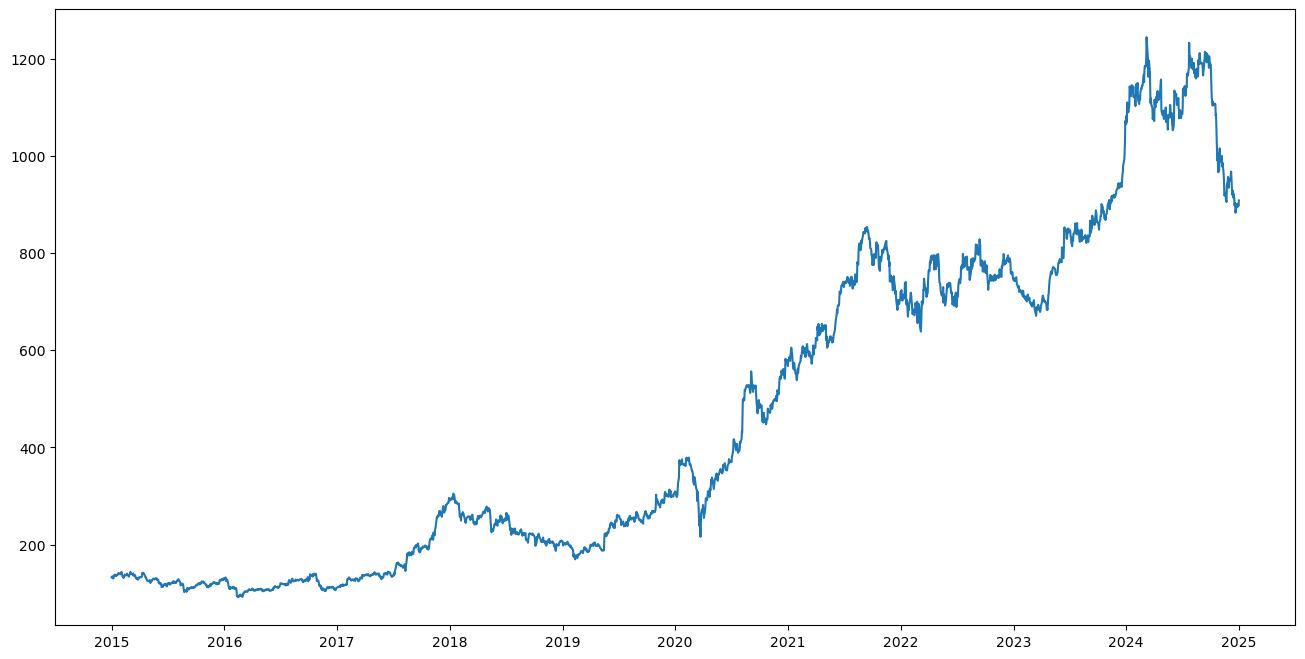

In [6]:
plt.figure(figsize=(16,8))
plt.plot(data['Close'],label='Closing Price')
plt.show()

In [7]:
data['Open-Close']=data['Open']-data['Close']
data['High-Low']=data['High']-data['Low']
data=data.dropna()

In [8]:
x=data[['Open-Close','High-Low']]
x.head()

Price,Open-Close,High-Low
Ticker,,
Date,,
2015-01-01,0.220062,1.232344
2015-01-02,-1.408405,2.332656
2015-01-05,-1.144327,2.508717
2015-01-06,3.344952,4.357234
2015-01-07,-1.100312,2.816795


intention is to tore +1 for the buy signal and -1 for the sell signal.the target variable is 'y' for clasificaion

In [9]:
y=np.where(data['Close'].shift(-1)>data['Close'],1,-1)

In [10]:
y.reshape(1,-1)

array([[ 1,  1, -1, ..., -1,  1, -1]])

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [12]:
# implemenntation of knn classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score


In [13]:
# using grid search to find the best parameter 
params={'n_neighbors':[2,3,4,5,6,7,8,9,10,11,12,13,14,15]}
knn=neighbors.KNeighborsClassifier()

In [14]:
model=GridSearchCV(knn,params,cv=5)


In [15]:
model.fit(x_train,y_train)


C:\Users\Nidhi Sharma\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Nidhi Sharma\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nidhi Sharma\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Nidhi Sharma\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts alo

C:\Users\Nidhi Sharma\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Nidhi Sharma\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Nidhi Sharma\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y

C:\Users\Nidhi Sharma\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Nidhi Sharma\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nidhi Sharma\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Nidhi Sharma\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts alo

C:\Users\Nidhi Sharma\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Nidhi Sharma\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nidhi Sharma\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Nidhi Sharma\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts alo

C:\Users\Nidhi Sharma\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Nidhi Sharma\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nidhi Sharma\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Nidhi Sharma\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts alo

C:\Users\Nidhi Sharma\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Nidhi Sharma\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Nidhi Sharma\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An err

{'n_neighbors': 15}


C:\Users\Nidhi Sharma\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Nidhi Sharma\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Nidhi Sharma\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y

In [18]:
print(model.best_params_)

{'n_neighbors': 15}


In [16]:
x_train=model.predict(x_train)
x_test=model.predict(x_test)
accuracy_train=accuracy_score(y_train,x_train)
accuracy_test=accuracy_score(y_test,x_test)


C:\Users\Nidhi Sharma\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Nidhi Sharma\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Nidhi Sharma\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An err

In [17]:
print(accuracy_train,accuracy_test)

0.6108108108108108 0.5235008103727715
